<a href="https://colab.research.google.com/github/Sergey7OV/CompoZit/blob/main/VKR_clean_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Импортируем все необходимые библиотеки для исследования
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
#Cмонтируем весь Google Disk в Colab:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Загружаем объединенный, очищенный и нормализорванный датасет
df = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum.xlsx')
#Удаляем лишний столбец
df = df.drop(columns='Unnamed: 0')

In [ ]:
#Поиск дубликатов строк - дубликаты строк отсутствуют
df[df.duplicated()].info()
#Удаляем столбец с категориальными данными
df = df.drop(columns='Угол нашивки')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       0 non-null      float64
 1   Плотность, кг/м3                      0 non-null      float64
 2   модуль упругости, ГПа                 0 non-null      float64
 3   Количество отвердителя, м.%           0 non-null      float64
 4   Содержание эпоксидных групп,%_2       0 non-null      float64
 5   Температура вспышки, С_2              0 non-null      float64
 6   Поверхностная плотность, г/м2         0 non-null      float64
 7   Модуль упругости при растяжении, ГПа  0 non-null      float64
 8   Прочность при растяжении, МПа         0 non-null      float64
 9   Потребление смолы, г/м2               0 non-null      float64
 10  Шаг нашивки                           0 non-null      float64
 11  Плотность нашивки              

KeyError: ignored

In [ ]:
#Поиск повторяющихся значений
df_dupl = df.copy()

for i in df.columns:
  df_dupl[i] = df.duplicated(i)
#Выведем матрицу повторяющихся значений
df_dupl

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,False,False,False,True,True,True,True,True,False
2,True,True,True,False,False,True,True,True,True,True,True,False
3,True,True,True,False,False,False,True,True,True,True,False,False
4,False,True,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,False,False,False,False,False,False,False,False,False,False,False,False
1019,False,False,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_dupl.describe().T

,count,unique,top,freq
Соотношение матрица-наполнитель,1023,2,False,1014
"Плотность, кг/м3",1023,2,False,1013
"модуль упругости, ГПа",1023,2,False,1020
"Количество отвердителя, м.%",1023,2,False,1005
"Содержание эпоксидных групп,%_2",1023,2,False,1004
"Температура вспышки, С_2",1023,2,False,1003
"Поверхностная плотность, г/м2",1023,2,False,1004
"Модуль упругости при растяжении, ГПа",1023,2,False,1004
"Прочность при растяжении, МПа",1023,2,False,1004
"Потребление смолы, г/м2",1023,2,False,1003


<Axes: >

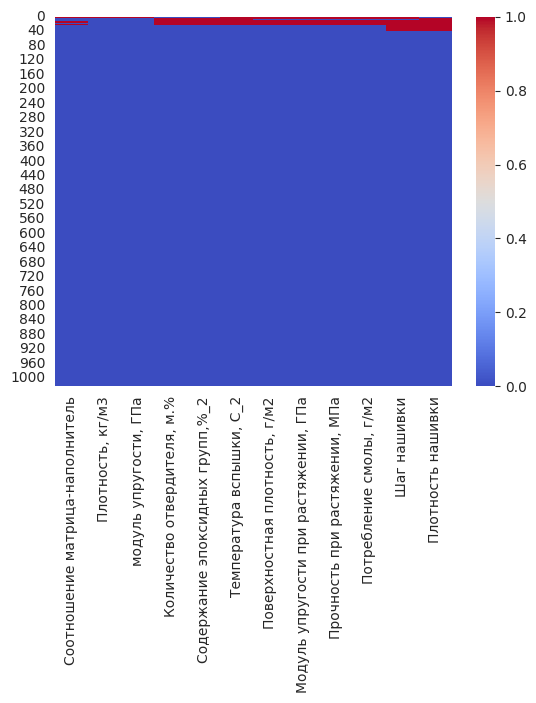

In [ ]:
#Составим диаграмму Тепловая карта
sns.heatmap(df_dupl, cmap='coolwarm')

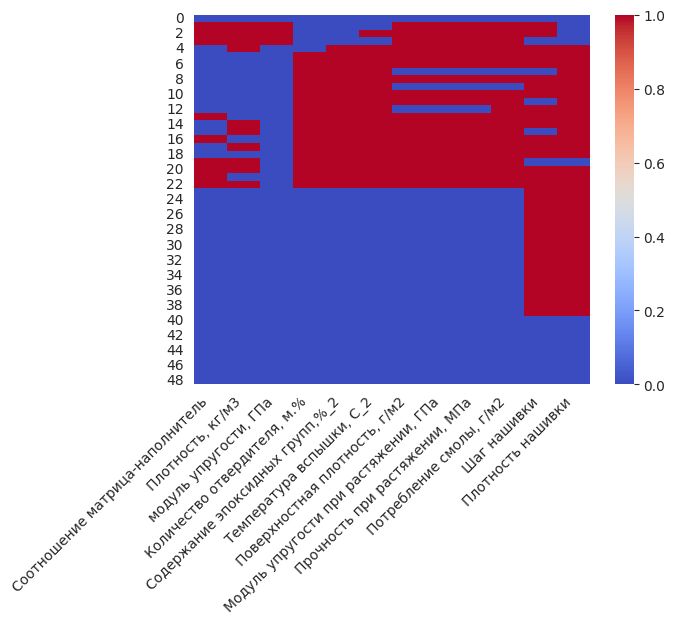

In [ ]:
#Видим, что некоторые данные повторяются в промежутке где-то до 50-й строчки. Составим диаграмму Тепловая карта на данных до 100-й строчки
sns.heatmap(df_dupl[0:49], cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#Выведем описательную статисктику для первых 23 строчки датасета
df_22 = df.drop(index = df.index[23:1023])
df_22.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Шаг нашивки,Плотность нашивки
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.919678,1978.695652,738.736842,111.860000,22.267857,284.615385,470.000000,73.333333,2455.555556,220.000000,6.434783,55.956522
std,0.901251,72.256132,333.385368,28.518029,2.429067,40.967325,308.868904,3.162278,496.553780,57.207755,2.727404,14.496013
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000
25%,2.209309,1915.000000,537.500000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,4.000000,52.000000
50%,2.877358,1980.000000,738.736842,129.000000,21.250000,300.000000,380.000000,73.333333,2455.555556,220.000000,7.000000,57.000000
75%,3.544678,2030.000000,817.000000,129.000000,22.267857,300.000000,470.000000,75.000000,3000.000000,220.000000,9.000000,60.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,10.000000,70.000000


In [ ]:
# Сохраним датасет c 23-мя значениями в файл в файл Excel
df_22.to_excel("/content/gdrive/MyDrive/Colab Notebooks/ВКР/data/X_sum_22.xlsx")

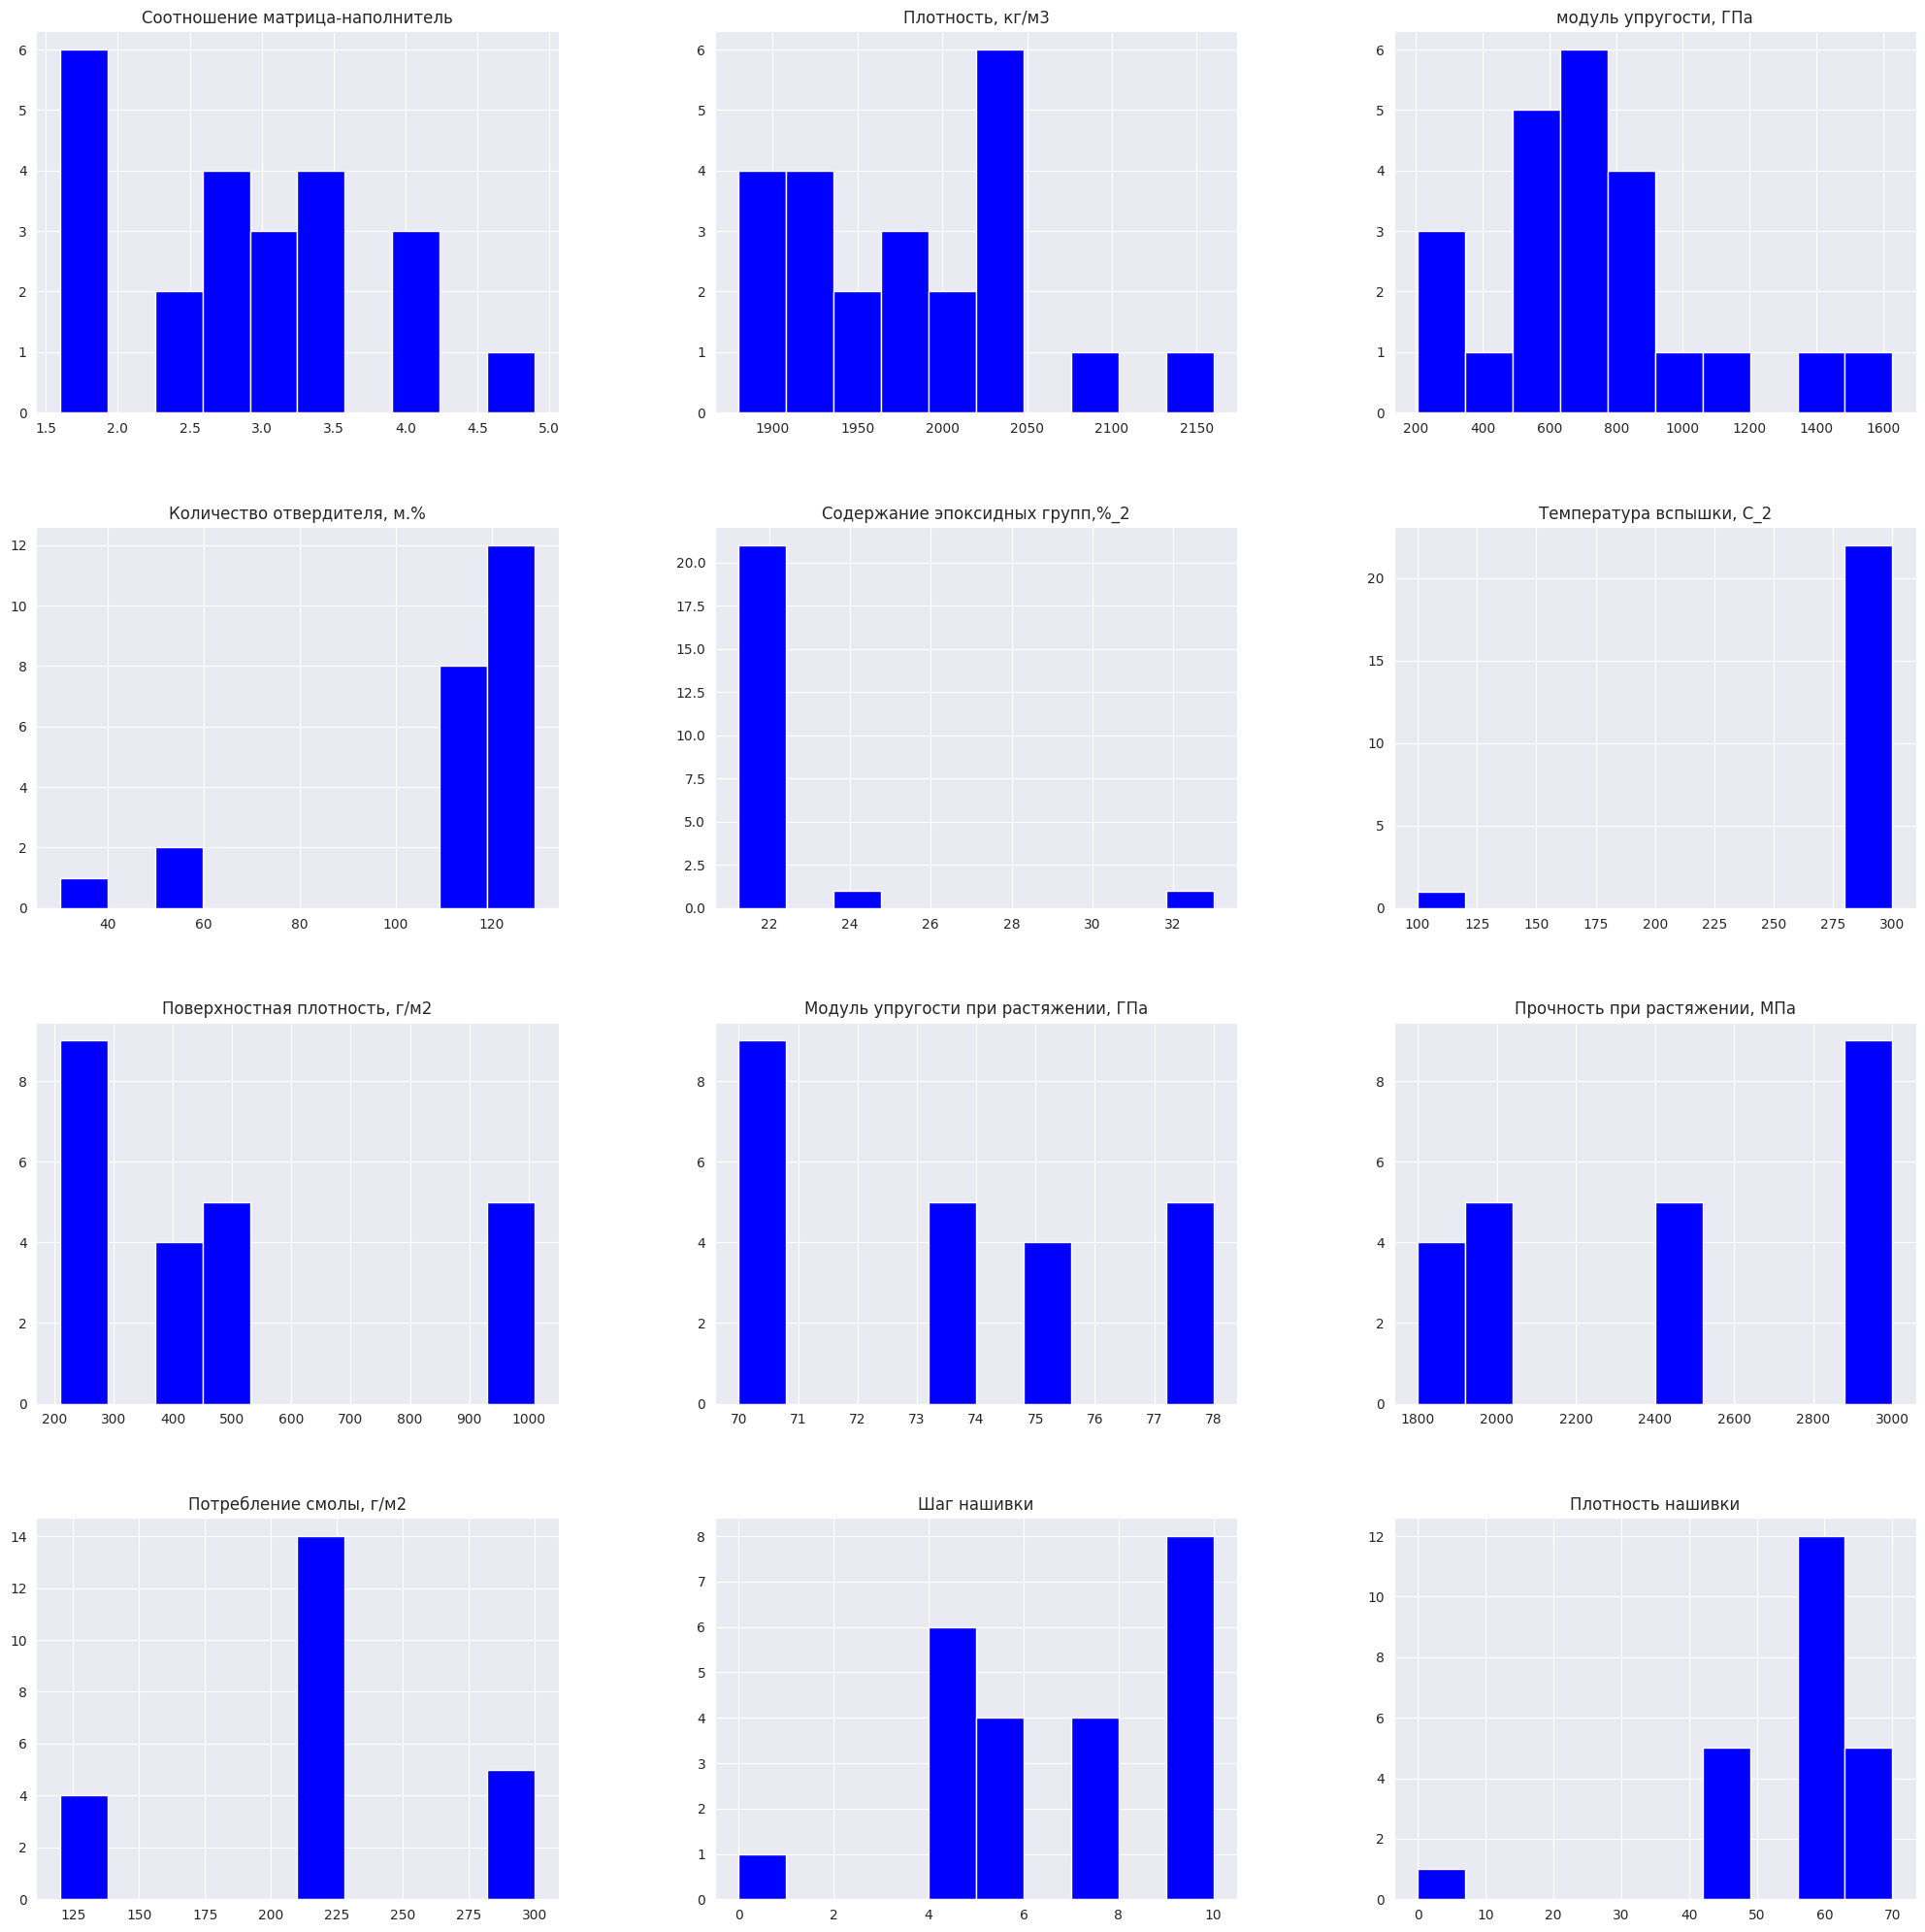

In [ ]:
# Построим гистограммы распределения каждой из переменных без нормализации и исключения выбросов
df_22.hist(figsize = (25,25), color = "b")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

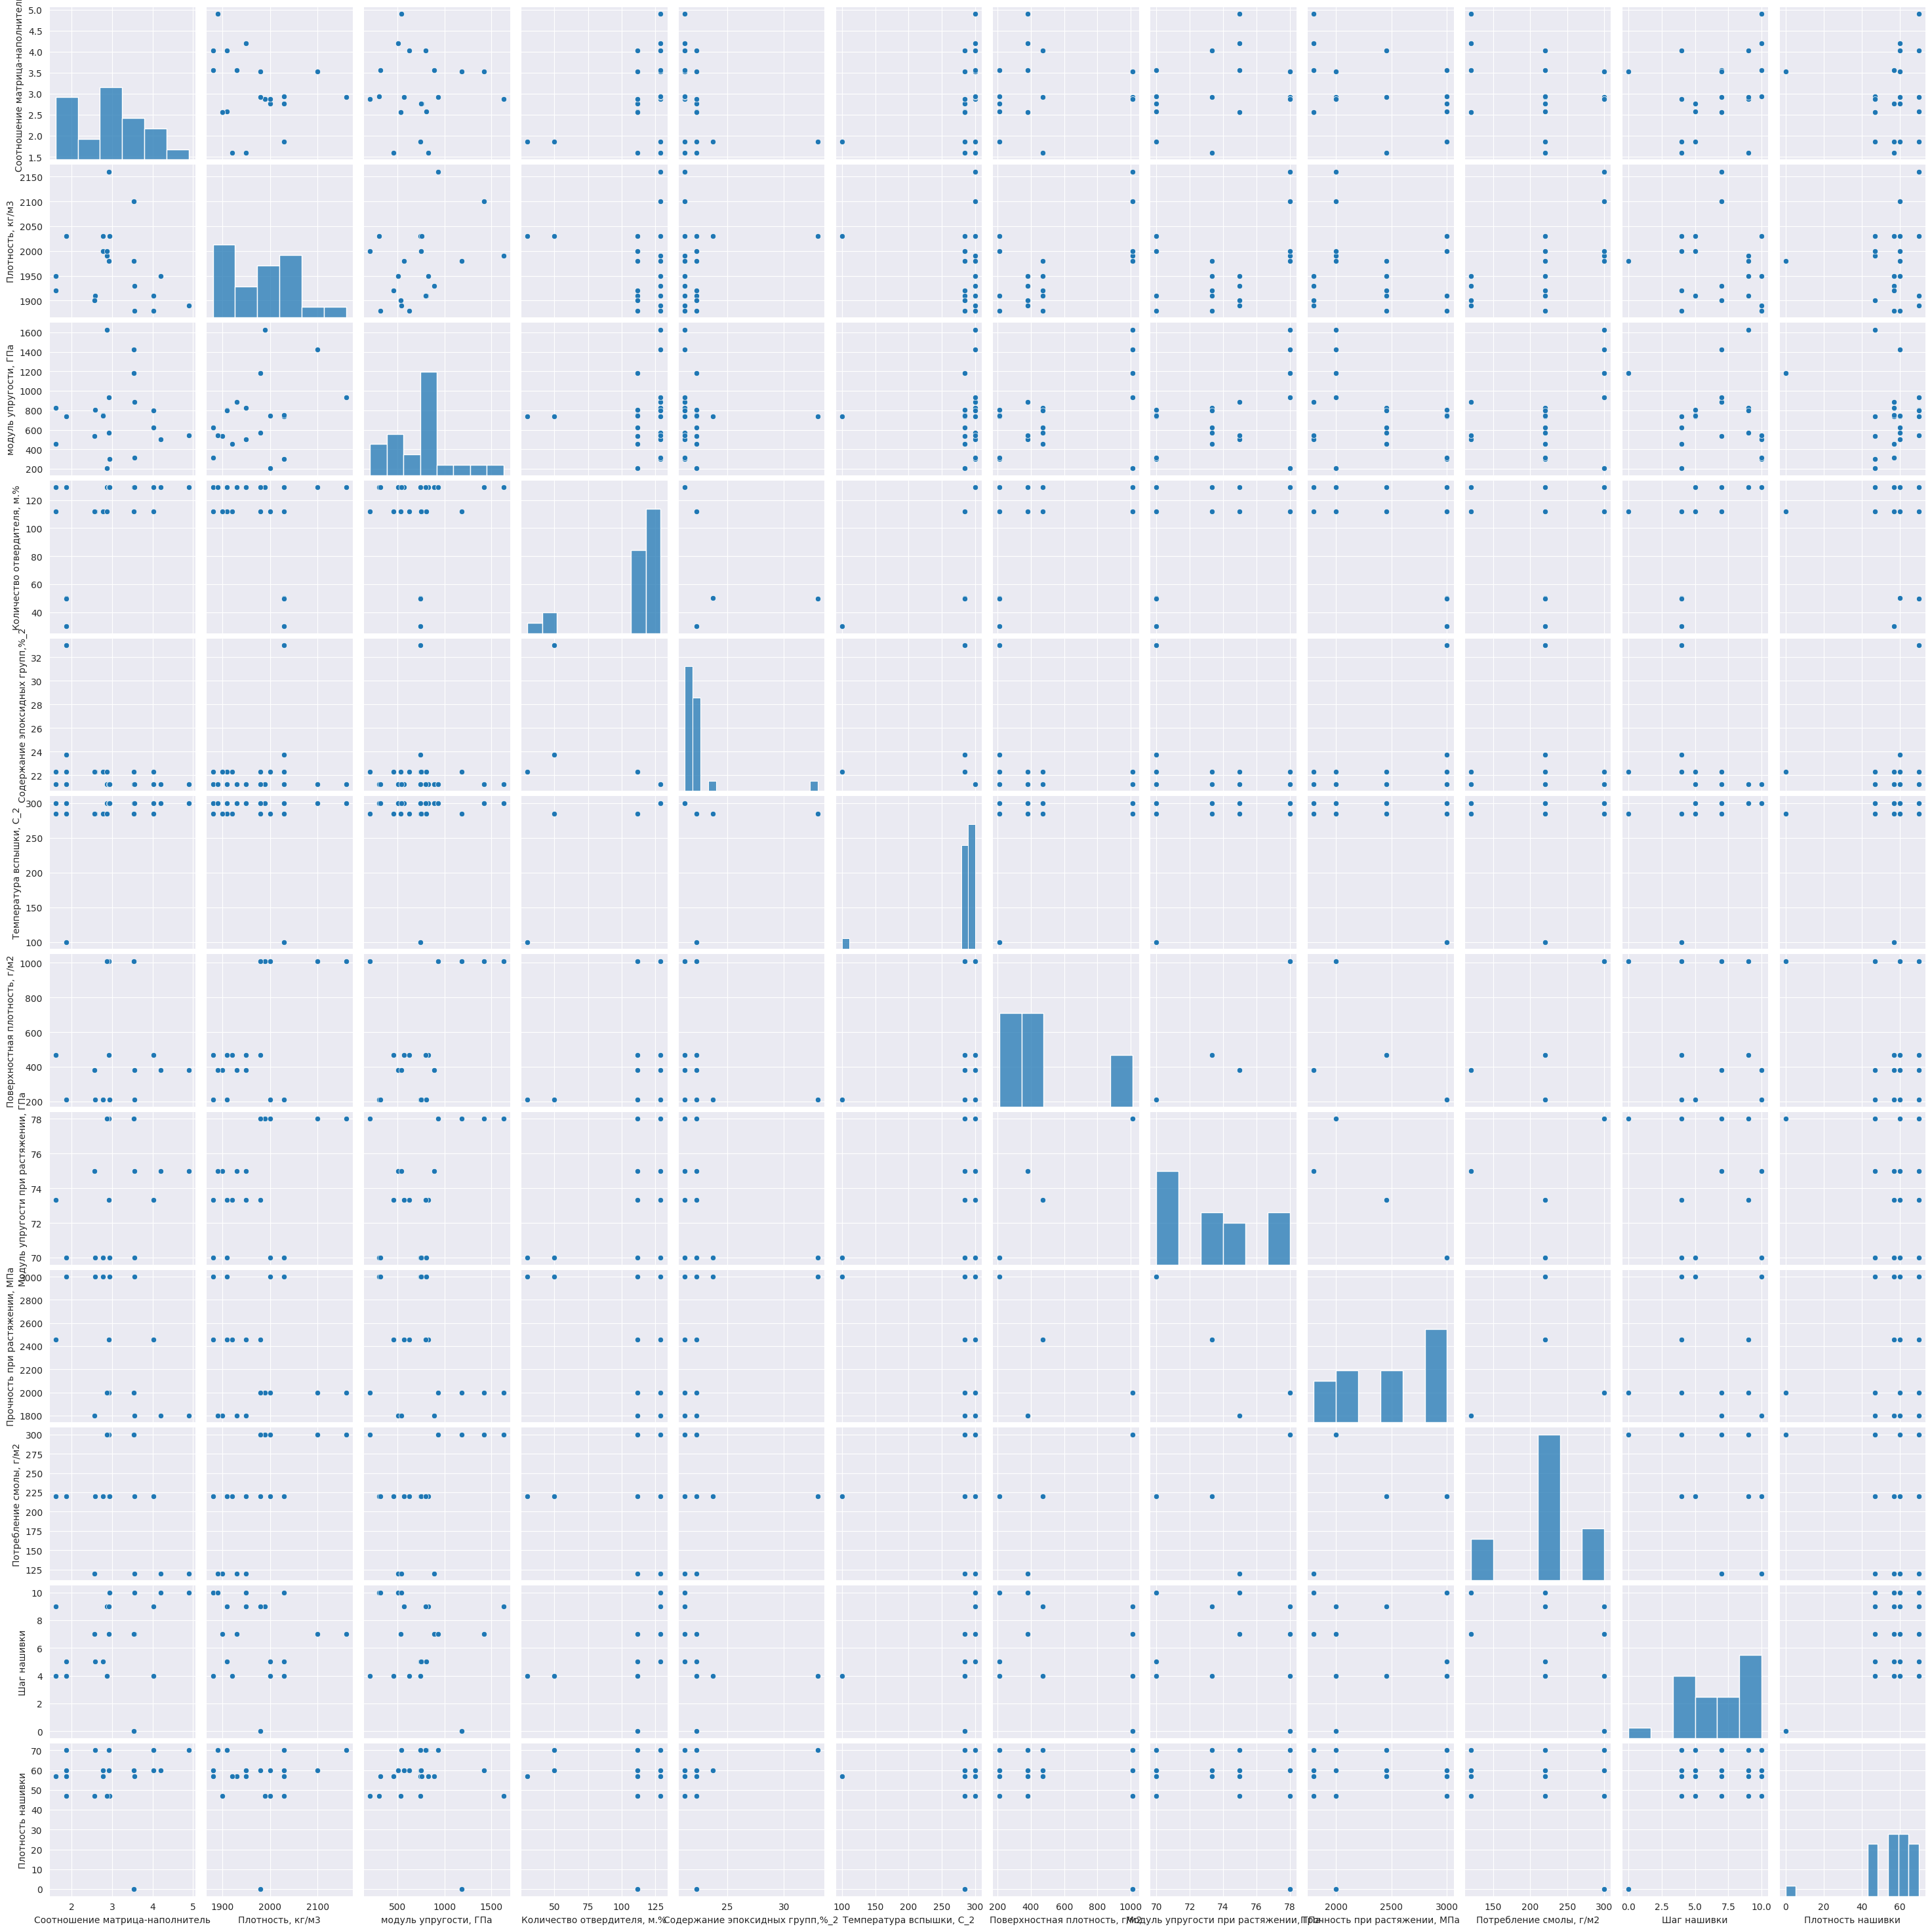

In [ ]:
#Нарисуем попарные графики рассеяния точек
sns.pairplot(df_22[df_22.columns])
plt.show

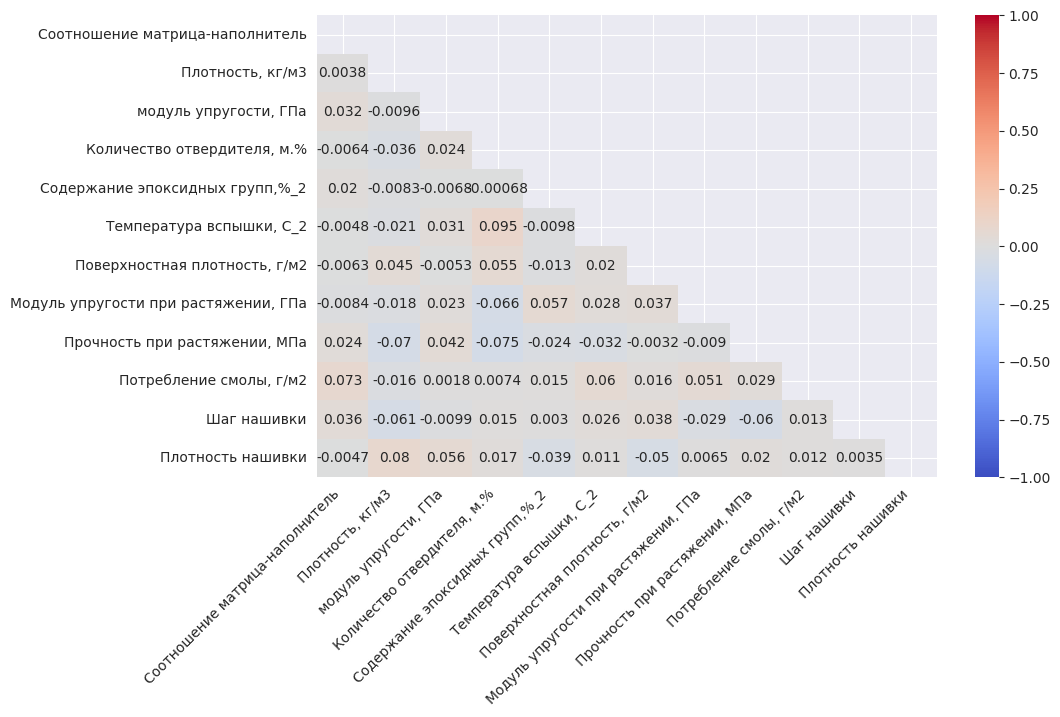

In [ ]:
# Матрица корреляции
correlation_matrix = np.triu(df_22.corr())
# Выводим признаки на тепловую карту
plt.figure(figsize= (10, 6))
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1, cmap='coolwarm', mask = correlation_matrix)
plt.xticks(rotation=45, ha='right')
plt.show()